## 페이스북 광고로 개인 관심사 분석
 
# 페이스북 관심사 입력 문석 https://goo.gl/MVnmWr

In [36]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib 
matplotlib.rc('font',family='HYsanB')

%matplotlib inline

###  data load

In [37]:
!pwd

/Users/goodvc/Data/fc-recsys-school/ch1


In [38]:
!head '/Users/goodvc/Data/fc-recsys-school/ch1/resource/facebook.csv'

In [39]:
raw_ds = pd.read_csv('/Users/goodvc/Data/fc-recsys-school/ch1/resource/facebook.csv'
                     ,index_col=0, encoding ='utf-8',skiprows=1 )
raw_ds.head(10)

,최규민,경규승,김남영,김성환,김태연,김한성,남지열,박범희,박재근,백종환,...,유대성,이용석,임재윤,정은섭,주지훈,최기철,최양휘,최은정,박가영,박준영
관심사,,,,,,,,,,,,,,,,,,,,,
여행,1,1,1,NaN,1,NaN,1,1,1,NaN,...,1,1,NaN,1,NaN,1,NaN,1,1,NaN
컴퓨터서버,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
통계학,1,1,1,1,NaN,NaN,NaN,NaN,1,NaN,...,1,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN
가족,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
검색엔진최적화,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35-45세,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
익스피디아,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
지앤선,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
블로더앤미디어,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


### Nan to 0 처리

In [40]:
ds = raw_ds.fillna(0)
ds.head()

,최규민,경규승,김남영,김성환,김태연,김한성,남지열,박범희,박재근,백종환,...,유대성,이용석,임재윤,정은섭,주지훈,최기철,최양휘,최은정,박가영,박준영
관심사,,,,,,,,,,,,,,,,,,,,,
여행,1,1,1,0,1,0,1,1,1,0,...,1,1,0,1,0,1,0,1,1,0
컴퓨터서버,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
통계학,1,1,1,1,0,0,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0
가족,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
검색엔진최적화,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
for name, row in ds.iterrows():
    if row.sum()>0:
        print name, row.sum()

여행 16.0
컴퓨터서버 3.0
통계학 10.0
가족 4.0
검색엔진최적화 1.0
35-45세 1.0
익스피디아 4.0
지앤선 1.0
블로더앤미디어 4.0
8퍼센트 6.0
스타트업 기업 11.0
사용자 경험 디자인 5.0
개인 금융 3.0
비즈니스 5.0
스포츠 4.0
온라인 쇼핑 6.0
게임 4.0
디자인 5.0
자바스크립트 1.0
iPhone 5.0
경기도성남 1.0
18세 이상 5.0
연애중 2.0
한국어 2.0
26~39세 5.0
영화 6.0
25~55세 5.0
자동차 2.0
음악 6.0
21~35세 12.0
엔터테인먼트 4.0
Netflix 4.0
Udemy 7.0
Wix(web디자인) 2.0
커피 3.0
패스트캠퍼스 15.0
서울 5.0
부모 1.0
Learningbinder 1.0
homify 1.0
the economist 3.0
한국어를 사용하는 18세 이상 4.0
잡플래닛 3.0
교육 5.0
글쓰기 3.0
공연 1.0
전자상거래 3.0
Wanted 3.0
와디즈 2.0
현대자동차 1.0
사랑 2.0
Mac OS X 4.0
스마트폰 1.0
버거킹 4.0
골프 1.0
라우드소싱 1.0
어학연수/유학 3.0
컴퓨터 5.0
워드프레스 2.0
온라인 광고 1.0
위시캣 3.0
문비서 1.0
Periscope Data 2.0
모바일 기기 2.0
디지털 마케팅 2.0
data analysis 2.0
컴퓨터 서버 1.0
스터디서치  2.0
쇼핑 및 패션 4.0
Simple Site 1.0
18~40세의 남성 2.0
고프로 3.0
명품 1.0
학사학위보유자 2.0
엔터테인먼트 1.0
대한민국에 거주하는 26~40세 3.0
도떼기 마켓 1.0
경기 부천 18-35세 1.0
머신 러닝 3.0
Facebook에서 도달하려는 타게팅 리스트 2.0
문학 1.0
E4ds Lounge 1.0
20~ 45세 남성 2.0
가전제품 2.0
비즈니스 및 산업 2.0
대한민국에 거주하는 20세 이상의 사람들 1.0
웹 호스팅 1.0
온라인쇼핑 4.0
IT(정보 기술) 2.0
항공

### 가장 유사한 사람 찾기

In [42]:
ds.T

관심사,여행,컴퓨터서버,통계학,가족,검색엔진최적화,35-45세,익스피디아,지앤선,블로더앤미디어,8퍼센트,...,HP Korea,자연,29cm,다이빙,아이디어스(idus),리복 코리아,제닉스스튜디오,식품 및 음료,nan,화장품을 해석하다
최규민,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
경규승,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
김남영,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
김성환,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
김태연,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
김한성,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
남지열,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
박범희,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
박재근,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
백종환,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
## 행과 열을 바꿈
ds_T = ds.T

In [44]:
def cal_similarities(name, ds):
    me = ds.loc[name]
    for (target, row) in ds.iterrows():
        if target == name :
            continue
        merge = me+row
        intersections = merge[merge>1].index.values
        print u"{0}-{1} 공동 관심사({3}) = {2}".format(name, target
                            , ", ".join(intersections)
                            , len(intersections))


In [45]:
cal_similarities(u'박가영', ds_T)

박가영-최규민 공동 관심사(1) = 여행
박가영-경규승 공동 관심사(1) = 여행
박가영-김남영 공동 관심사(3) = 여행, 스타트업 기업, 18세 이상
박가영-김성환 공동 관심사(1) = 쇼핑 및 패션
박가영-김태연 공동 관심사(1) = 여행
박가영-김한성 공동 관심사(1) = 스타트업 기업
박가영-남지열 공동 관심사(2) = 여행, 스타트업 기업
박가영-박범희 공동 관심사(2) = 여행, 쇼핑 및 패션
박가영-박재근 공동 관심사(1) = 여행
박가영-백종환 공동 관심사(2) = 위시캣, 쇼핑 및 패션
박가영-신은지 공동 관심사(3) = 여행, 스타트업 기업, 18세 이상
박가영-양치복 공동 관심사(2) = 여행, 스타트업 기업
박가영-오세창 공동 관심사(1) = 여행
박가영-유대성 공동 관심사(2) = 여행, 스타트업 기업
박가영-이용석 공동 관심사(1) = 여행
박가영-임재윤 공동 관심사(2) = 스타트업 기업, 위시캣
박가영-정은섭 공동 관심사(1) = 여행
박가영-주지훈 공동 관심사(1) = 스타트업 기업
박가영-최기철 공동 관심사(3) = 여행, 18세 이상, 한국어
박가영-최양휘 공동 관심사(2) = 스타트업 기업, 18세 이상
박가영-최은정 공동 관심사(2) = 여행, 스타트업 기업
박가영-박준영 공동 관심사(0) = 


In [46]:
from scipy.spatial import distance 
from scipy import stats
import seaborn as sns
import scipy

def cos_cdist(matrix, vector, dist):
    """
    Compute the cosine distances between each row of matrix and vector.
    """
    v = vector.reshape(1, -1)
    return scipy.spatial.distance.cdist(matrix, v, 'cosine').reshape(-1)

def matrix_similarity( matrix_ds, dist='jaccard'):
    sim_mat = []
    name = []
    for idx, row in matrix_ds.iterrows():
        name.append(idx)
        sim_mat.append(cos_cdist( matrix_ds, row, dist ).tolist())
    ds = 1-pd.DataFrame(sim_mat, columns=name, index=name)
    return ds

### 유사도 메트릭스를 그려보자 

In [47]:
matrix_similarity(ds_T)[:10]

,최규민,경규승,김남영,김성환,김태연,김한성,남지열,박범희,박재근,백종환,...,유대성,이용석,임재윤,정은섭,주지훈,최기철,최양휘,최은정,박가영,박준영
최규민,1.000000,0.230089,0.131876,0.169031,0.223607,0.141421,0.100000,0.081650,0.163299,0.138013,...,0.316228,0.223607,0.210819,0.095346,0.100000,0.100000,0.074536,0.252982,0.105409,0.000000
경규승,0.230089,1.000000,0.455150,0.194461,0.342997,0.271163,0.383482,0.375735,0.250490,0.158777,...,0.242536,0.342997,0.323381,0.146254,0.230089,0.153393,0.114332,0.194029,0.080845,0.161690
김남영,0.131876,0.455150,1.000000,0.167183,0.294884,0.466252,0.461566,0.376867,0.215353,0.273009,...,0.278019,0.368605,0.347524,0.125739,0.527504,0.263752,0.393179,0.333623,0.208514,0.139010
김성환,0.169031,0.194461,0.167183,1.000000,0.094491,0.119523,0.084515,0.138013,0.138013,0.291606,...,0.178174,0.283473,0.178174,0.080582,0.169031,0.169031,0.125988,0.106904,0.089087,0.000000
김태연,0.223607,0.342997,0.294884,0.094491,1.000000,0.158114,0.223607,0.273861,0.091287,0.077152,...,0.235702,0.250000,0.117851,0.106600,0.223607,0.223607,0.083333,0.282843,0.117851,0.235702
김한성,0.141421,0.271163,0.466252,0.119523,0.158114,1.000000,0.212132,0.173205,0.000000,0.243975,...,0.223607,0.158114,0.298142,0.000000,0.282843,0.141421,0.105409,0.402492,0.074536,0.000000
남지열,0.100000,0.383482,0.461566,0.084515,0.223607,0.212132,1.000000,0.326599,0.163299,0.138013,...,0.316228,0.335410,0.210819,0.095346,0.400000,0.300000,0.149071,0.189737,0.210819,0.000000
박범희,0.081650,0.375735,0.376867,0.138013,0.273861,0.173205,0.326599,1.000000,0.200000,0.338062,...,0.086066,0.273861,0.258199,0.233550,0.163299,0.244949,0.243432,0.206559,0.172133,0.086066
박재근,0.163299,0.250490,0.215353,0.138013,0.091287,0.000000,0.163299,0.200000,1.000000,0.056344,...,0.172133,0.273861,0.172133,0.311400,0.244949,0.163299,0.182574,0.103280,0.086066,0.000000
백종환,0.138013,0.158777,0.273009,0.291606,0.077152,0.243975,0.138013,0.338062,0.056344,1.000000,...,0.072739,0.308607,0.290957,0.131590,0.276026,0.207020,0.257172,0.261861,0.145479,0.000000


### 계층적 군집화를 해 보자 

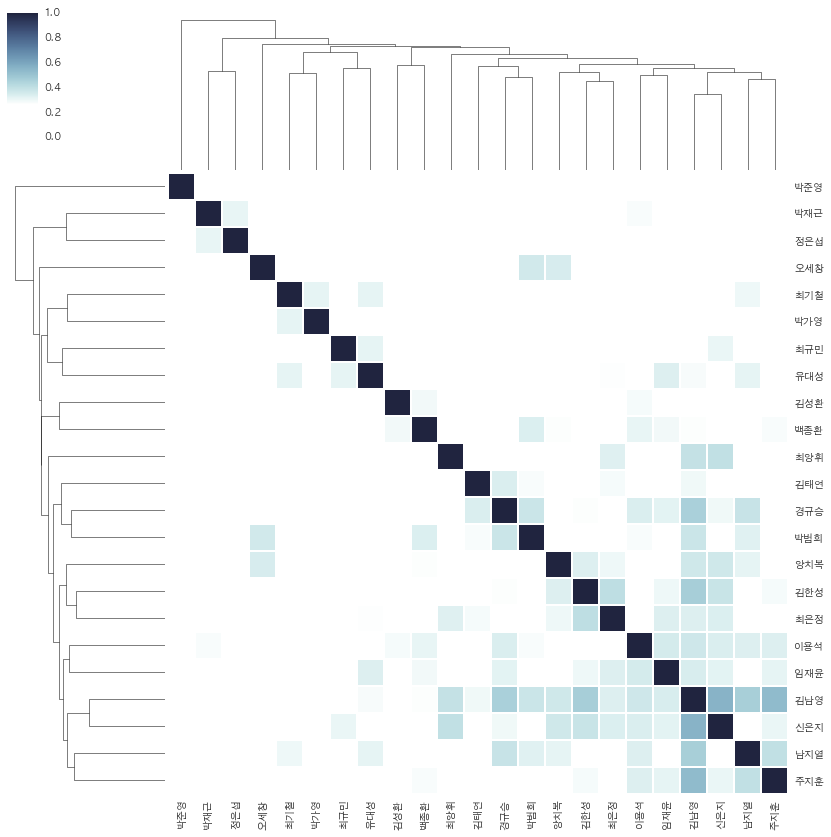

In [52]:
# -*- coding: utf-8 -*-
import matplotlib

tmp_ds = matrix_similarity( ds_T )

# sns.set(style="whitegrid", palette="pastel", color_codes=True,font_scale=1.2)
matplotlib.rc('font',family='AppleGothic')
matplotlib.rc('font',size=15)

cmap = sns.cubehelix_palette(as_cmap=True, rot=-.2, light=1.3)

cm = sns.clustermap(tmp_ds, cmap=cmap, linewidths=.5)

cm.fig.set_figwidth(14)
cm.fig.set_figheight(14)